# Plotting Key Timeseries 

Plots simple but important timeseries from a discrete set of MOM6 experiments.

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm

In [2]:
session=cc.database.create_session()

In [3]:
client = Client()
client

distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-2h7ijryr', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-em84k_uh', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-pbrpl44j', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-4m166szg', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-h1ycxz18', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-j95qqy5e', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-3oxd4c8z', purging
distributed.diskutils - INFO - Found stale lock file and direc

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37841,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://127.0.0.1:37089,Total threads: 4
Dashboard: /proxy/39851/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:35233,


In [3]:
expts = ['panant-01-hycom1','panant-01-hycom1-v6','panant-01-hycom1-v10','panant-01-hycom1-v11']

## Looking at KE, for spinup

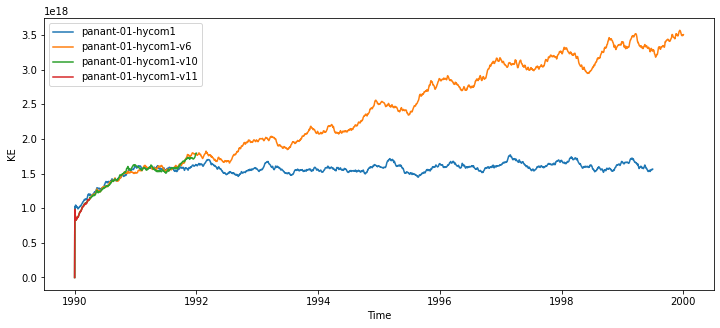

In [4]:
fig=plt.figure(figsize=(12,5))
for expt in expts:
    darray = cc.querying.getvar(expt,'KE', session,ncfile='ocean.stats.nc',decode_times=False)
    darray.coords['Time'] = darray.coords['Time']/365
    darray.sum('Layer').plot(label=expt)
plt.legend()

## Global Heat 

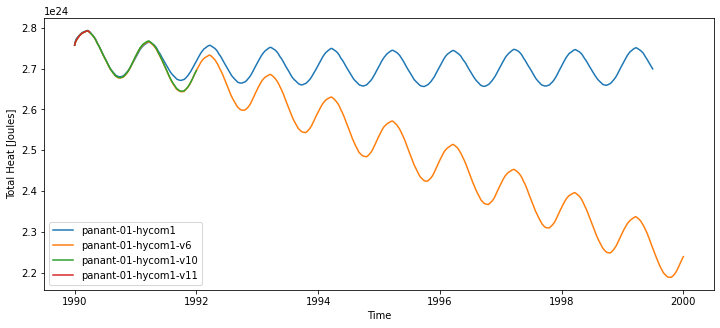

In [5]:
fig=plt.figure(figsize=(12,5))
for expt in expts:
    darray = cc.querying.getvar(expt,'Heat', session,ncfile='ocean.stats.nc',decode_times=False)
    darray.coords['Time'] = darray.coords['Time']/365
    darray.plot(label=expt)
plt.legend()

## Global Salt

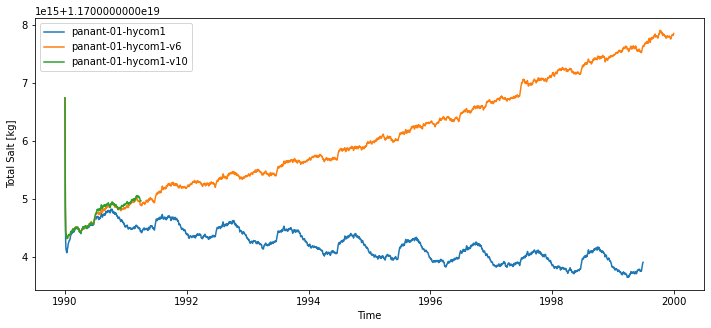

In [7]:
fig=plt.figure(figsize=(12,5))
for expt in expts:
    darray = cc.querying.getvar(expt,'Salt', session,ncfile='ocean.stats.nc',decode_times=False)
    darray.coords['Time'] = darray.coords['Time']/365
    darray.plot(label=expt)
plt.legend()

## CFL Criteria

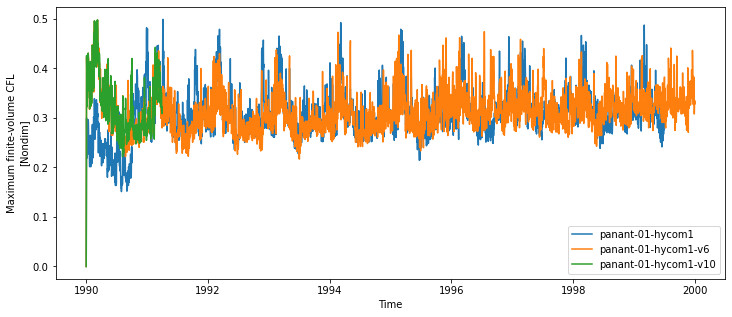

In [8]:
fig=plt.figure(figsize=(12,5))
for expt in expts:
    darray = cc.querying.getvar(expt,'max_CFL_trans', session,ncfile='ocean.stats.nc',decode_times=False)
    darray.coords['Time'] = darray.coords['Time']/365
    darray.plot(label=expt)
plt.legend()

## ACC Transport

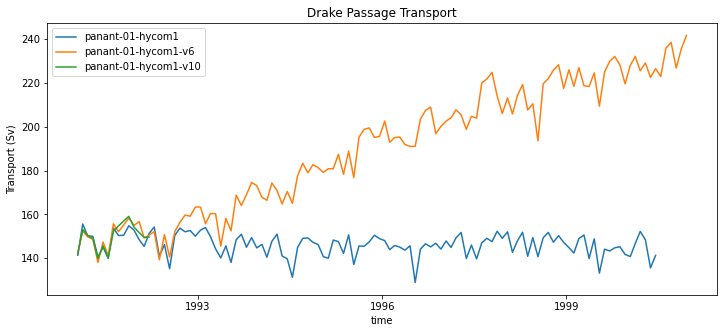

In [9]:
plt.figure(figsize=(12,5))
for expt in expts:
    umo_2d = cc.querying.getvar(expt,'umo_2d', session)
    DP = umo_2d.sel(xq=-71,method='nearest').sum('yh')/1e9
    DP.plot(label=expt)
    
plt.title('Drake Passage Transport')
plt.ylabel('Transport (Sv)')
plt.legend()

## Overturning metrics

Text(0.5, 1.0, 'Abyssal cell transport - 55°S')

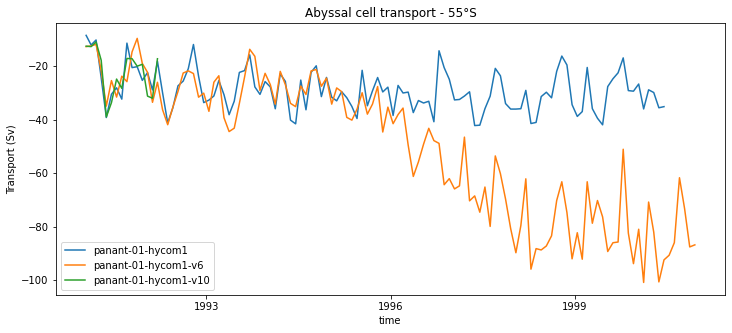

In [10]:
plt.figure(figsize=(12,5))
lat = -55
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1036.5,1037.5)).min(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)
plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Abyssal cell transport - %d°S'%(-lat))

Text(0.5, 1.0, 'Upper cell transport - 45°S')

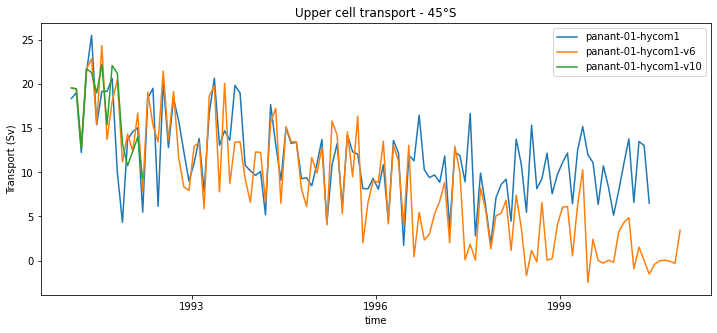

In [11]:
plt.figure(figsize=(12,5))
lat = -45
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1035,1037)).max(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)
plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Upper cell transport - %d°S'%(-lat))

## Sea Ice Extent

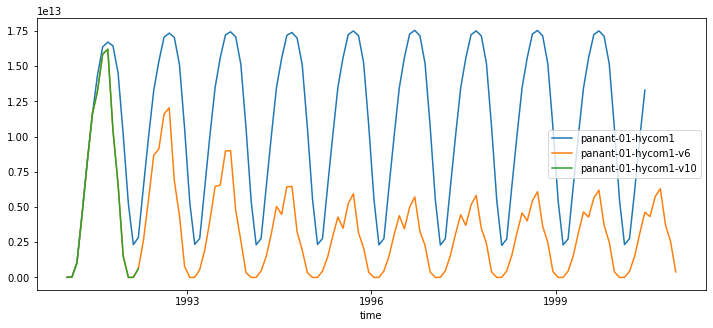

In [12]:
fig=plt.figure(figsize=(12,5))
areacello = cc.querying.getvar('panant-01-hycom1','areacello', session,n=1)
for expt in expts:
    SIC = cc.querying.getvar(expt,'siconc', session,frequency='1 monthly').rename({'yT':'yh', 'xT':'xh'})
    SIE = (SIC*areacello).sum(['xh','yh']).load()
    SIE.plot(label=expt)
plt.legend()